PROJECT: HANDWRITTEN DIGIT CLASSIFICATION

Loading Required Packages


In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D

Loading data from Dataset(MNIST)

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#checking the quantity and size of image.
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

CHECKING INPUT AND OUTPUT

Correct Value:  8


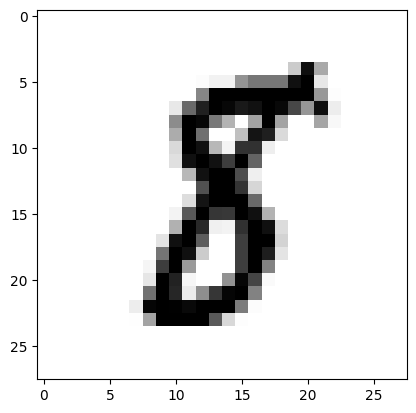

In [8]:
plt.imshow(x_train[125],cmap='binary')
print("Correct Value: ", y_train[125])

PREPROCESSING 
1) NORMALIZING
2) ADDITION OF EXTRA DIMENSION

In [9]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [10]:
#normalizing
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

#reshaping
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

#After updation
print(x_train[1])

(60000, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  

BUILDING CNN MODEL 

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

COMPILING AND TRAINING THE MODEL

In [12]:
#COMPILING
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
#TRAINING
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1275 - accuracy: 0.9604
Epoch 2/3
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0512 - accuracy: 0.9841
Epoch 3/3
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0379 - accuracy: 0.9883


EVALUATING MODEL

In [13]:
(result_loss,result_acc) = model.evaluate(x_test,y_test)
print('LOSS: ',result_loss)
print('ACCURACY: ',result_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0289 - accuracy: 0.9903
LOSS:  0.028949717059731483
ACCURACY:  0.9902999997138977


TESTING MODEL 

313/313 [==============================] - 3s 8ms/step
Predicted value:  9
Real value:  9


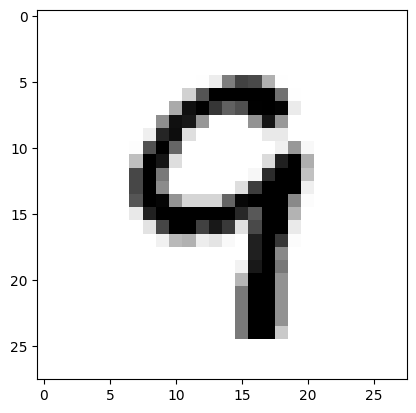

In [14]:
predicted = model.predict(x_test)
print('Predicted value: ',np.argmax(predicted[150]))
plt.imshow(x_test[150],cmap='binary')

print('Real value: ',y_test[150])

SAVING THE MODEL INTO HDF5 FORMAT FILE

In [15]:
model.save("store_model.h5")

LOADING THE MODEL FROM FILE

In [16]:
from keras.models import load_model
loaded_model = load_model('store_model.h5')

GUI IMPLEMENTATION CODE FOR THE USER INTERFACE


In [17]:
import pyttsx3

def classify(input):
    prediction = loaded_model.predict(input.reshape( -1,28, 28, 1)).tolist()[0]
    for i in range(10):
        if(prediction[i]==1):
            engine = pyttsx3.init()
            text=str(i)
            engine.say(text)
            engine.runAndWait()
            # print(i)    
    return {str(i): prediction[i] for i in range(10)}

In [ ]:
import gradio as gr

label = gr.outputs.Label(num_top_classes=1)
interface = gr.Interface(fn=classify, inputs="sketchpad", outputs=label, 
live=True)
interface.launch()
# print(label)